# Classifier development

The notebook in which I do a rough draft of the classifier scripts before putting them into a script

In [1]:
import pandas as pd
import ast
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# from week 13 in YY's Data Vis Class
# import spacy
# import wordcloud
# import en_core_web_sm
# # nlp = spacy.load('en')
# nlp = spacy.load('en_core_web_sm')
# from collections import Counter

# something a warning told me to do?
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 150)


print("done")

done


In [2]:
import import_func as imp
import tags_work as tgs
import desc_vis as vis


elist_filename = "../data/editorials-1.jl"
tags_filename = "../data/by_article_110219.jl"
full_filename = "../data/by_article_fulltext_112919-2.jl"

# get full text dataset as a df
full_df = imp.init_df(full_filename, "full")

# get full dataset as a dict
full_dict = imp.init_df(full_filename, "full", "dict")

print("done")

done


In [3]:
import random
import string
sample=5

print(full_dict["headline"][sample])
print(full_dict["tags"][sample])
print(full_dict["text"][sample])

it's april and i still don't have a job! the panicked scientist's guide to accelerated job searches
['tooling up', 'advice', 'early career', 'graduate', 'undergraduate', 'academic', 'government', 'industry', 'americas']
  by   t's 3 a.m. you've been at the bench for 18 hours finishing up your final set of thesis or postdoc experiments. with hard work and a little luck, you will be able to finish your project in 3 months, just in time to graduate or move on to the next position. then the dread sets in. here it is, april, and you still don't have a job offer. as if you weren't busy enough, now you have to handle a job search--and find a position--in 90 days ... aaaaaaaaaaaa!!!!! even if this isn't you, you probably know at least one or two people in this situation. and boy, what fun they can be around the lab or office! so, in the spirit of lab and office tranquility, this column is about the accelerated job search: the type of job search when you don't care what color your parachute is,

In [52]:
# sample for manual coding
# sample = [random.randint(1, len(full_dict)) for j in range(50)]
sample1 = [3188, 1591, 2152, 4044, 2789, 5685, 5191, 2360, 518, 189, 5509, 3033, 499, 2024, 3563, 4216, 1422, 3904, 3256, 420, 4940, 3397, 6087, 4548, 227, 4817, 1351, 765, 4161, 5139, 4899, 5243, 1334, 4234, 2629, 815, 5516, 2170, 1765, 3183, 5143, 3225, 1759, 5209, 5249, 4487, 3447, 4963, 2656, 825]
print(sample)

# Make sure sample has only unique values
print(len(sample))
print(len(set(sample)))

[3188, 1591, 2152, 4044, 2789, 5685, 5191, 2360, 518, 189, 5509, 3033, 499, 2024, 3563, 4216, 1422, 3904, 3256, 420, 4940, 3397, 6087, 4548, 227, 4817, 1351, 765, 4161, 5139, 4899, 5243, 1334, 4234, 2629, 815, 5516, 2170, 1765, 3183, 5143, 3225, 1759, 5209, 5249, 4487, 3447, 4963, 2656, 825]
50
50


In [27]:
print(type(sample))
full_df.tail()

<class 'list'>


,headline,tags,authors,date,time,text,bio,date_seq,month_seq,year,n_posts_author,column1,column2
6106,poster presentations are a great way to showcase your science,"[working life, non-disciplinary]","anila d’mello, oliver flynn",2019-11-07,2:00 pm,"by , anila began to work on her poster 1 week before the conference. the quality didn’t matt...",[anila d’mello is a postdoc at the massachusetts institute of technology in cambridge.],8438,287,2019,1,no,no
6107,"to escape the stress of grad school, i read fiction","[working life, non-disciplinary]",jeff clark,2019-11-14,2:00 pm,"by i arrived home from work, my mind racing. i was scheduled to perform an experiment using a...",[jeff clark is a ph.d. candidate at imperial college london.],8445,287,2019,1,yes,yes
6108,conflict in your research group? here are four strategies for finding a resolution,"[letters to young scientists, column, non-disciplinary]","william a. cunningham, june gruber, jay j. van bavel , neil a. lewis, jr.",2019-11-18,3:25 pm,"by , , , as a faculty member, there are few things as rewarding as watching students and p...",[william a. cunningham is a professor of psychology at the university of toronto in canada.],8449,287,2019,1,yes,yes
6109,why i sidestep politics to teach climate science,"[working life, non-disciplinary]",ragupathy kannan,2019-11-21,2:00 pm,by i sat down at my desk to read the student evaluations for my undergraduate biology courses...,[ragupathy kannan is a professor at the university of arkansas in fort smith.],8452,287,2019,1,no,no
6110,i took a chance on an unexpected career opportunity—and expanded my cultural horizons,"[working life, non-disciplinary]",barbara gastel,2019-11-25,1:00 am,by golden autumn. the best time of year in beijing. i’d just flown in from the united states ...,[barbara gastel is a professor at texas a&m university in college station.],8456,287,2019,1,no,no


In [6]:
# clean punctuation

print(type(string.punctuation))

def no_punctuation(text):
    for mark in string.punctuation:
        text = text.replace(mark,"")
    return(text)

test = no_punctuation(full_dict["text"][5])
print(test)

<class 'str'>
  by   ts 3 am youve been at the bench for 18 hours finishing up your final set of thesis or postdoc experiments with hard work and a little luck you will be able to finish your project in 3 months just in time to graduate or move on to the next position then the dread sets in here it is april and you still dont have a job offer as if you werent busy enough now you have to handle a job searchand find a positionin 90 days  aaaaaaaaaaaa even if this isnt you you probably know at least one or two people in this situation and boy what fun they can be around the lab or office so in the spirit of lab and office tranquility this column is about the accelerated job search the type of job search when you dont care what color your parachute is youre just praying that something happens when you pull the ripcord step 1 dont panic i know i know easy advice to give but i do want to reassure you that things are probably not as bad as you think for three reasons a you are not alone less 

In [7]:
first_pronouns = [" i "," im ", " ive ", " id "," my ", " me "]
second_pronouns = [" you "," youre ", " youve "," youd "," your "]
third_pronouns = []

counts = {}
counts4df = {"id":[],"first":[],"second":[],"wc":[]}

for samp in sample:
    count1 = 0
    count2 = 0
    w_text = no_punctuation(full_dict["text"][samp])
    for pro in first_pronouns:
        count1 += w_text.count(pro)
    for pro in second_pronouns:
        count2 += w_text.count(pro)
    wc = len(w_text.split(" "))
    counts[samp] = {"first":count1, "second":count2, "wc":wc}
    counts4df["id"].append(samp)
    counts4df["first"].append(count1)
    counts4df["second"].append(count2)
    counts4df["wc"].append(wc)

# print(counts)
counts_df = pd.DataFrame(counts4df)
counts_df.head(10)

,id,first,second,wc
0,3188,3,6,1671
1,1591,0,73,897
2,2152,5,1,926
3,4044,0,1,416
4,2789,0,4,2221
5,5685,2,6,504
6,5191,0,7,1022
7,2360,49,17,1243
8,518,0,0,411
9,189,17,79,1433


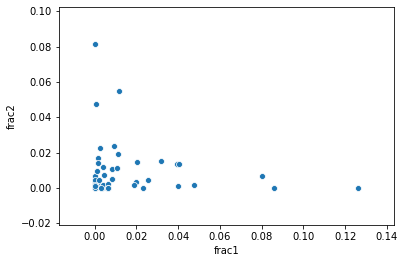

In [8]:
counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

# sns.distplot(counts_df["frac1"], color="blue")
# sns.distplot(counts_df["frac2"], color="red")

sns.scatterplot(x="frac1", y="frac2", data=counts_df)



In [21]:
# setting up above script into a function

def pronouns(f_dict, sample="none"):
    first_pronouns = [" i "," im ", " ive ", " id "," my ", " me "]
    second_pronouns = [" you "," youre ", " youve "," youd "," your "]
    third_pronouns = []

    if sample == "none":
        sample = [i for i in range(len(f_dict))]

    counts = {}
    counts4df = {"id":[],"first":[],"second":[],"wc":[]}

    for samp in sample:
        count1 = 0
        count2 = 0
        w_text = no_punctuation(f_dict["text"][samp])
        for pro in first_pronouns:
            count1 += w_text.count(pro)
        for pro in second_pronouns:
            count2 += w_text.count(pro)
        wc = len(w_text.split(" "))
        counts[samp] = {"first":count1, "second":count2, "wc":wc}
        counts4df["id"].append(samp)
        counts4df["first"].append(count1)
        counts4df["second"].append(count2)
        counts4df["wc"].append(wc)

    c_df = pd.DataFrame(counts4df)
    return(c_df)

counts_df = pronouns(full_dict)
counts_df.head()

,id,first,second,wc
0,0,12,113,2387
1,1,2,70,1277
2,2,4,16,1286
3,3,6,15,1120
4,4,5,59,1720


In [54]:
# setting up above script into a function

def pronouns(f_df, sample="none"):
    first_pronouns = [" i "," im ", " ive ", " id "," my ", " me "]
    second_pronouns = [" you "," youre ", " youve "," youd "," your "]
    third_pronouns = []

    if sample == "none":
        sample = [i for i in range(len(f_df))]

    counts = {}
    counts4df = {"id":[],"year":[],"first":[],"second":[],"wc":[]}

    for samp in sample:
        count1 = 0
        count2 = 0
        w_text = no_punctuation(f_df["text"][samp])
        for pro in first_pronouns:
            count1 += w_text.count(pro)
        for pro in second_pronouns:
            count2 += w_text.count(pro)
        wc = len(w_text.split(" "))
        counts[samp] = {"first":count1, "second":count2, "wc":wc}
        counts4df["id"].append(samp)
        counts4df["year"].append(f_df["year"][samp])
        counts4df["first"].append(count1)
        counts4df["second"].append(count2)
        counts4df["wc"].append(wc)

    c_df = pd.DataFrame(counts4df)
    return(c_df)

def count_pro(clean_text, person):
    if person == "first":
        pronouns = [" i "," im ", " ive ", " id "," my ", " me "]
    elif person == "second":
        pronouns = [" you "," youre ", " youve "," youd "," your "]
    else:
        pronouns = []
    
    count = 0

    for pro in pronouns:
        count += w_text.count(pro)
    return(count)

counts_df = pronouns(full_dict)
print(max(counts_df["year"]))

2019


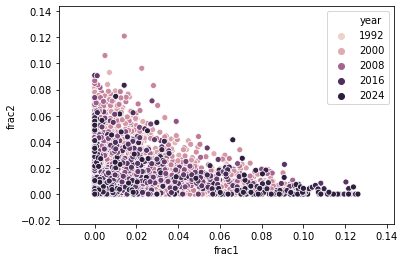

In [50]:
counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

sns.scatterplot(x="frac1", y="frac2", hue="year", data=counts_df)
plt.savefig("../figs/pronounsovertime.png")

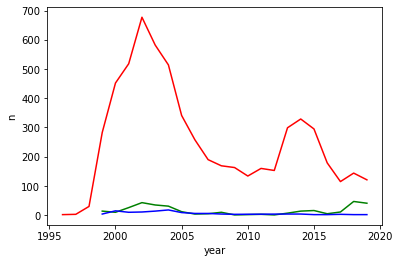

In [49]:
# Try very rough buckets based on the proportion of pronouns

# first_df = counts_df[counts_df.frac1 > np.quantile(counts_df.frac1, .6)]
# second_df = counts_df[counts_df.frac2 > np.quantile(counts_df.frac2, .6)]

first_df = counts_df[counts_df.frac1 > max(counts_df.frac1)*.5]
second_df = counts_df[counts_df.frac2 > max(counts_df.frac2)*.5]

first_vis = vis.prep_per(first_df, group_by="year")
second_vis = vis.prep_per(second_df, group_by="year")
full_vis = vis.prep_per(full_df, group_by = "year")

sns.lineplot(x = "year", y = "n", color = "green", data=first_vis)
sns.lineplot(x = "year", y = "n", color = "blue", data=second_vis)
sns.lineplot(x = "year", y = "n", color = "red", data = full_vis)

plt.savefig("../figs/bucketsovertime.png")

In [62]:
counts4df = {"id":[],"first":[],"second":[],"wc":[],"first_f":[],"second_f":[], "input":[]}

for num in sample1:
    text = full_dict["text"][num]
    wc = len(text.split(" "))
    print(num)
    print(count_pro(text, "first")/wc)
    print(count_pro(text, "second")/wc)
    print(text)
    advance = input("any key")
    counts4df["id"].append(samp)
    # counts4df["year"].append(f_df["year"][samp])
    counts4df["first"].append(count_pro(text, "first"))
    counts4df["second"].append(count_pro(text, "second"))
    counts4df["wc"].append(wc)
    counts4df["first_f"].append(count_pro(text, "first")/wc)
    counts4df["second_f"].append(count_pro(text, "second")/wc)
    counts4df["input"].append(advance)


ludes both basic science and clinical projects will be valuable for advancing scientific discoveries out of the lab and into a clinical environment."     
4963
0.002280501710376283
0.004561003420752566
  by     any scientists got into science for the sheer love of it. they were captivated and fascinated by the world around them and needed to know more. however, some scientists who started out passionate about their studies later decided it wasn't all it was cracked up to be. for them, a course correction--at least--is called for, but sometimes that's not enough: sometimes, you need a fresh start.   the   careers back catalog contains numerous articles about changing careers. they suggest a variety of strategies for getting unstuck. but for this month's feature, we won't suggest you take a battery of tests to measure your aptitude, take stock of your transferable skills, or set up a half-dozen informational interviews (although none of those are bad ideas).  instead, think back to what 

In [63]:
hand_test = pd.DataFrame(counts4df)
hand_test.head(20)

,id,first,second,wc,first_f,second_f,input
0,825,2,4,1671,0.001197,0.002394,3
1,825,2,4,897,0.002230,0.004459,2
2,825,2,4,926,0.002160,0.004320,3
3,825,2,4,416,0.004808,0.009615,
4,825,2,4,2221,0.000900,0.001801,
5,825,2,4,504,0.003968,0.007937,
6,825,2,4,1022,0.001957,0.003914,
7,825,2,4,1243,0.001609,0.003218,
8,825,2,4,411,0.004866,0.009732,
9,825,2,4,1433,0.001396,0.002791,
